Esse notebook utiliza um conjunto de dados de valores de diárias de hospedagem e faz uma regressão linear utilizando a biblioteca sklearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [ ]:
#O arquivo precisa ser upado pro notebook sempre que uma nova sessão do Colab for iniciada
address="/content/custo_diaria.csv"
df_custoDiaria= pd.read_csv(address, sep= ';')

Conhecendo visualmente o formato da minha base

In [ ]:
df_custoDiaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549


In [ ]:
df_custoDiaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   qtd_pessoas   30 non-null     int64
 1   valor_diaria  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


Descrição da minha base:

In [ ]:
df_custoDiaria.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


Obtendo o coeficiente de correlação de Pearson para dizer se esta é uma análise é uma análise válida. Em seguida plotando a matriz de correlação pra facilitar a visualização

In [ ]:
x_arr = df_custoDiaria.iloc[:,0].values
y_arr= df_custoDiaria.iloc[:,1].values

np.corrcoef(x_arr, y_arr)



array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

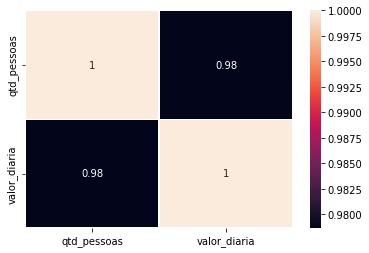

In [ ]:
correlation = df_custoDiaria.corr()
plot = sns.heatmap(correlation, annot = True, linewidths=.3 )
plot

Tratando os dados

In [ ]:
#os arrays precisam ser transformados em colunas
x_col= x_arr.reshape(-1,1)
y_col= y_arr.reshape(-1,1)
x_col.shape

(30, 1)

Regressão dos dados

In [ ]:
#criando o objeto do tipo regressão linear para meu modelo
regressao_diaria= LinearRegression()
type(regressao_diaria)

sklearn.linear_model._base.LinearRegression

In [ ]:
#aqui é feito o treinamento com o parametro fit
regressao_diaria.fit(x_col,y_col)

LinearRegression()

In [ ]:
#verificando o intercepto da minha regressão, para ver se deu tudo certo
a=float(regressao_diaria.intercept_)

186.00229281307384

In [ ]:
#verificando o coeficiente angular
b=float(regressao_diaria.coef_)

array([[51.14094547]])

In [ ]:
#Criei uma função simples que prediz o valor da diária dada a minha regressão e o número de pessoas 
def diaria(pessoas, regression):
  a=float(regression.intercept_)
  b=float(regression.coef_)
  valor=a+b*pessoas
  return(valor)

#e.g.
diaria(27, regressao_diaria)

1566.8078205769552

Plotando meu resultado

In [ ]:
y_predict= []
x_predictor= []
for i in range (65):
  x_predictor.append(i)
  y_predict.append(diaria(i, regressao_diaria))
y_predict= np.array(y_predict)
x_predictor=np.array(x_predictor)

grafico = px.scatter(x= x_arr, y=y_arr)
grafico.add_scatter(x= x_predictor, y=y_predict)
grafico.show()

Avaliando a qualidade da análise

In [ ]:
#percentual de chance de acerto do modelo
regressao_diaria.score(x_col, y_col)

0.9577871649322629

In [ ]:
#visualizar os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_predict = []
for i in x_col:
  y_predict.append(diaria(i, regressao_diaria))
y_predict = np.array(y_predict)

#Erro médio quadrado
MSE = mean_squared_error(y_col, y_predict)
MSE

36867.67840031127

In [ ]:
#Erro médio Absoluto
MAE = mean_absolute_error(y_col, y_predict)
MAE

138.91296481574125

In [ ]:
#Raiz do erro médio quadrado (Desvio padrão)

np.sqrt(MSE)

192.0095789285297